# **DECISION TREE CLASSIFIER**
### **DATASET - Social Network Ads**

The goal is to predict whether a user will purchase a product based on age and estimated salary

In [40]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
X = df.iloc[:,2:4].values
y = df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
    criterion = "entropy"
)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [11]:
y_pred = classifier.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Accuracy: 0.8375
Confusion Matrix: 
 [[46  6]
 [ 7 21]]


<Axes: >

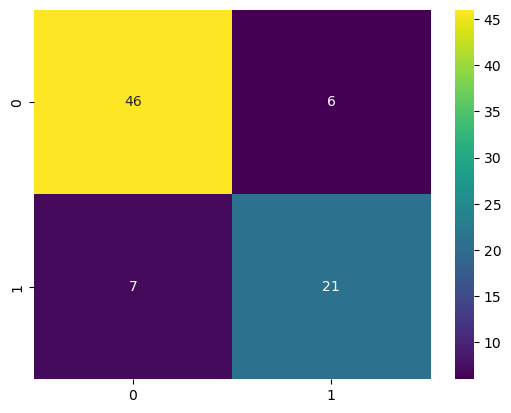

In [20]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='viridis')

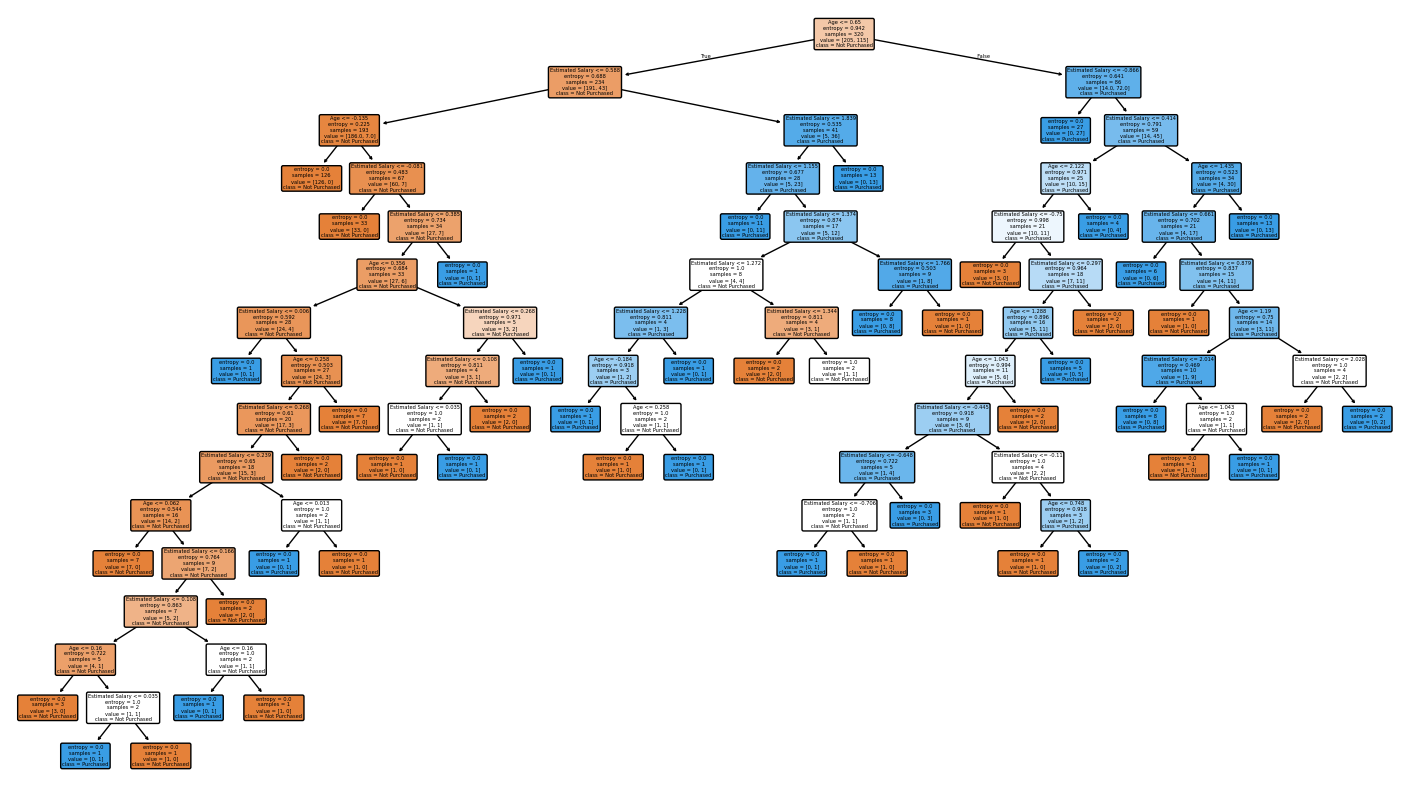

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plot_tree(
    classifier,
    feature_names=["Age","Estimated Salary"],
    class_names = ["Not Purchased","Purchased"],
    filled = True,
    rounded = True
)
plt.show()

In [30]:
#hyperparameter
from sklearn.tree import DecisionTreeClassifier
classifier_ = DecisionTreeClassifier(
    criterion = "entropy",max_depth=4
)
classifier_.fit(X_train,y_train)
y_pred_ = classifier_.predict(X_test)

In [31]:
print(f"Accuracy  :{accuracy_score(y_test,y_pred_)}")

Accuracy  :0.9125


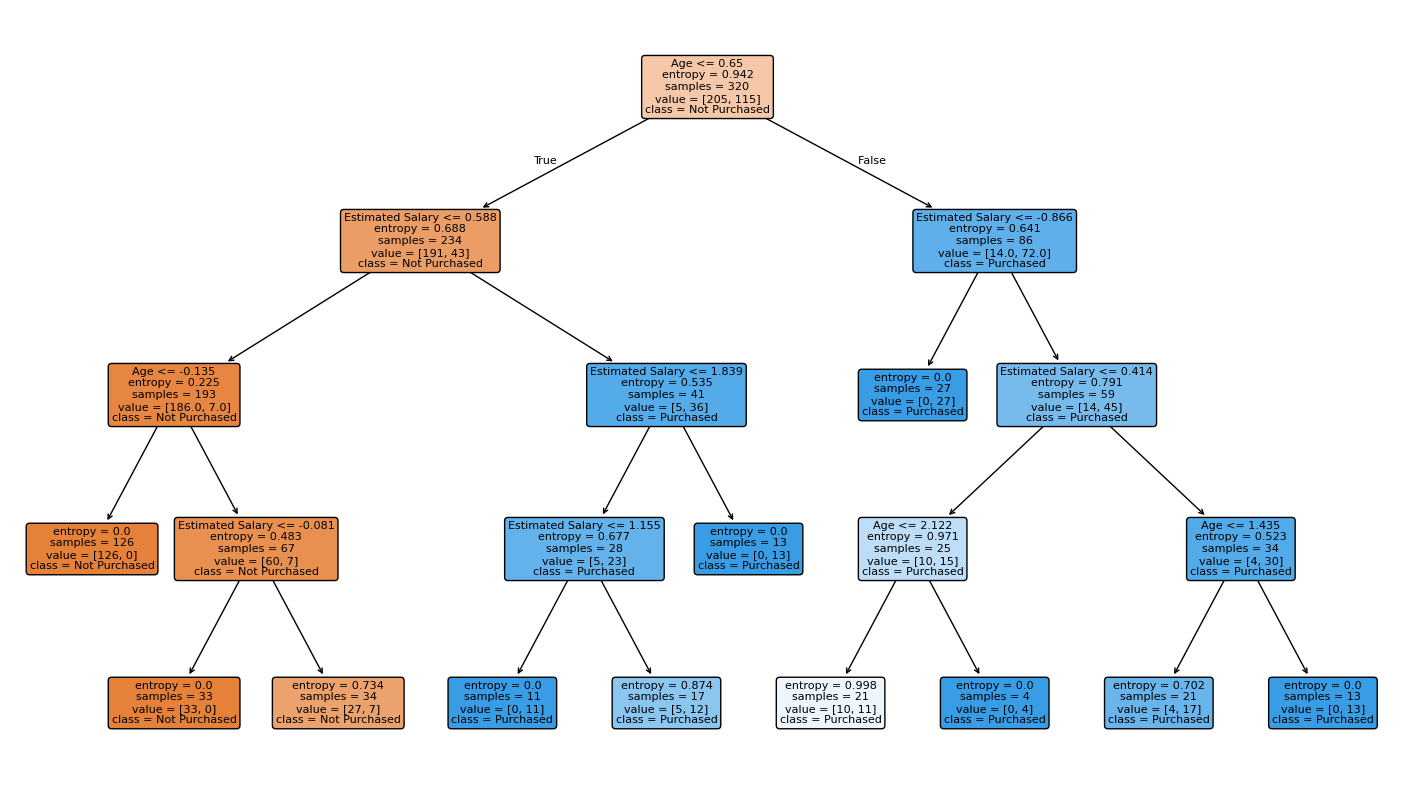

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plot_tree(
    classifier_,
    feature_names=["Age","Estimated Salary"],
    class_names = ["Not Purchased","Purchased"],
    filled = True,
    rounded = True
)
plt.show()

## **DATASET--- Titanic**
##### Using Titanic passenger data, our goal is to predict whether a passenger survived or not based on their details.

In [33]:
df = sns.load_dataset("titanic")

In [34]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [37]:
df = df[["survived","pclass","sex","age","fare","embarked"]]
df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [38]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
fare          0
embarked      2
dtype: int64

In [41]:
df["age"].fillna(df["age"].median(),inplace=True)
df["embarked"].fillna(df["embarked"].mode()[0],inplace=True)

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cols in df.select_dtypes(include='object'):
    df[cols] = le.fit_transform(df[cols])

In [43]:
df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


In [51]:
x = df.drop("survived",axis=1)
y = df["survived"]

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [53]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [56]:
model = DecisionTreeClassifier(criterion = "entropy",max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [59]:
y_pred = model.predict(x_test)

In [60]:
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")

Accuracy: 0.7988826815642458


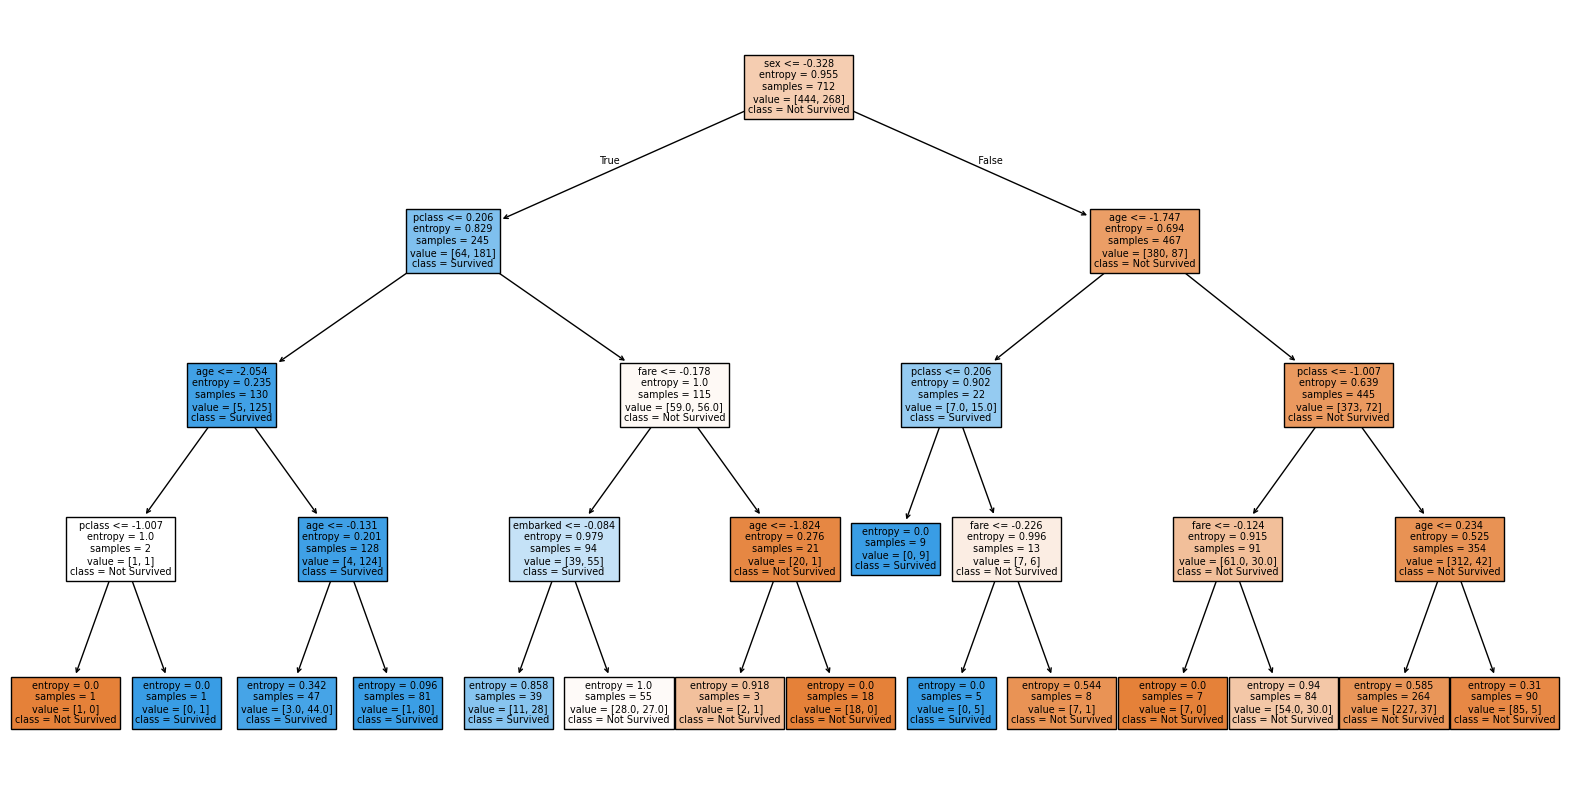

In [61]:
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names = x.columns,
    class_names = ["Not Survived","Survived"],
    filled = True
)
plt.show()

In [64]:
new_passenger = pd.DataFrame([[3,1,25,7,2]],columns=x.columns)
pred = model.predict(new_passenger)
if(pred[0]==0):
    print("Passenger is not likely to survive ❌")
else:
    print("Passenger is likely to survive ✅")

Passenger is not likely to survive ❌


In [78]:
new_passenger = pd.DataFrame([[1,14,80,3,0]],columns=x.columns)
pred = model.predict(new_passenger)
if(pred[0]==0):
    print("Passenger is not likely to survive ❌")
else:
    print("Passenger is likely to survive ✅")

Passenger is not likely to survive ❌
